In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiki\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("Reviews.csv")
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [3]:
print(data.describe())

                Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  4999.000000           4999.000000             4999.000000  4999.000000   
mean   2500.000000              1.580516                2.067614     4.150230   
std    1443.231328              5.585047                6.289233     1.326627   
min       1.000000              0.000000                0.000000     1.000000   
25%    1250.500000              0.000000                0.000000     4.000000   
50%    2500.000000              0.000000                1.000000     5.000000   
75%    3749.500000              2.000000                2.000000     5.000000   
max    4999.000000            187.000000              216.000000     5.000000   

               Time  
count  4.999000e+03  
mean   1.294921e+09  
std    4.802157e+07  
min    9.617184e+08  
25%    1.271376e+09  
50%    1.309219e+09  
75%    1.330301e+09  
max    1.351210e+09  


In [4]:
data = data.dropna()

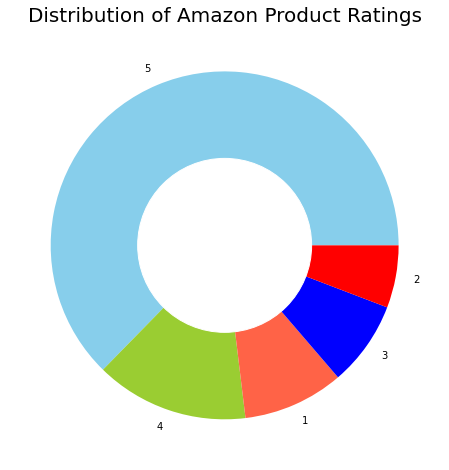

In [5]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

According to the figure above, more than half of people rated products they bought from Amazon with 5 stars, which is good. Now, I’m going to add three more columns to this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the customer reviews mentioned in the Text column of the dataset:

In [6]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


Now let’s see how most people rated the products they bought from Amazon:

In [7]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive ")
    elif (b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral ")
sentiment_score(x, y, z)

Neutral 


So, most people are neutral when submitting their experiences with the products they have purchased from Amazon. Now let’s see the total of all sentiment scores:

In [8]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  957.4620000000026
Negative:  208.63200000000006
Neutral:  3832.899000000014


So we can say that most of the reviews of the products available on Amazon are positive, as the total sentiment scores of Positive and Neural are much higher than Negative scores.